In [184]:
import pandas as pd
import re
import datetime
import numpy as np
import matplotlib.pyplot as plt
import string 
import warnings
warnings.simplefilter('ignore')


In [5]:
def load_data(resume_path):
    df = pd.read_excel(resume_path)
    df.columns = [remove_space(name) for name in df.columns.to_list()]
    return df

In [4]:
def remove_space(text):
    text = re.sub(r'\s+$', '', text)
    text = re.sub(r'^\s+', '', text)
    return text

In [82]:
def cap_words(words):
    try:
        new_word = string.capwords(words)
        return new_word
    except AttributeError:
        return np.nan

In [155]:
def find_competitor(company, competitor_lst):
    pat_comp =r'.*?(\b(?:{})\b).*?'.format('|'.join(competitor_lst))
    try:
        return re.match(pat_comp, company).group(1)
    except AttributeError:
        return np.nan
    except TypeError:
        return np.nan

In [186]:
def add_competitor_flag(df, colname_lst):
    df2 = df[colname_lst]
    df2["work1_flag"] = df2.work1_company.apply(cap_words).apply(lambda x: find_competitor(x, comp))
    df2["work2_flag"] = df2.work2_company.apply(cap_words).apply(lambda x: find_competitor(x, comp))
    df2["work3_flag"] = df2.work3_company.apply(cap_words).apply(lambda x: find_competitor(x, comp))
    df2["work4_flag"] = df2.work4_company.apply(cap_words).apply(lambda x: find_competitor(x, comp))
    df2["work5_flag"] = df2.work5_company.apply(cap_words).apply(lambda x: find_competitor(x, comp))
    df2["work6_flag"] = df2.work6_company.apply(cap_words).apply(lambda x: find_competitor(x, comp))
    df2["work7_flag"] = df2.work7_company.apply(cap_words).apply(lambda x: find_competitor(x, comp))
    df3 = df2[["employee_code", "work1_flag", "work2_flag", "work3_flag", "work4_flag", "work5_flag", "work6_flag", "work7_flag"]]
    df3["competitor_experience"] = df3.apply(lambda row: 0 if 
                                             pd.isna(row.work1_flag) and 
                                             pd.isna(row.work2_flag) and 
                                             pd.isna(row.work3_flag) and
                                             pd.isna(row.work4_flag) and 
                                             pd.isna(row.work5_flag) and 
                                             pd.isna(row.work6_flag) and
                                             pd.isna(row.work7_flag)
                                             else 1, axis=1)
    return df3

In [201]:
resume = load_data("../data/05242020_manual_extraction_template.xlsx")
colname_lst = ["employee_code", "work1_company", "work2_company", "work3_company", \
               "work4_company", "work5_company", "work6_company", "work7_company"]
comp = ['Freedom', 'Koodo', 'Shaw', 'Telus', 'Bell', 'Rogers', 'The Mobile Shop', \
        'Best Buy', 'Videotron', 'Wow', 'Mobile', 'The Source', 'Walmart']
df_final = add_competitor_flag(resume, colname_lst)

In [202]:
df_final.head() # 1 Yes 0 No 

,employee_code,work1_flag,work2_flag,work3_flag,work4_flag,work5_flag,work6_flag,work7_flag,competitor_experience
0,BDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,F6Q,NaN,Rogers,NaN,NaN,NaN,NaN,NaN,1
2,MRN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,MXO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,N0Y,NaN,Best Buy,NaN,NaN,NaN,NaN,NaN,1


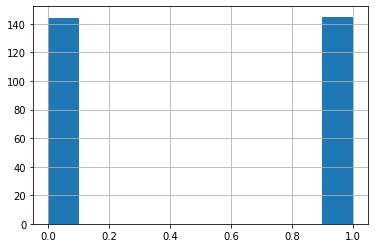

In [203]:
df_final.competitor_experience.hist()
plt.show()

In [197]:
df_final.to_csv("../result/competitor_experience.csv", index=False)